# Домашнее задание 5. Градиентный спуск.

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """

        return 1/(X.shape[0]) * (np.linalg.norm(X.dot(w) - y))**2 # Вычисляем значение функции потерь при помощи X, y и w и возвращаем его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y = np.transpose(np.mat(y))
        w = np.transpose(np.mat(w))

        return np.array(np.transpose(2/(X.shape[0]) * np.transpose(X) * (X*w - y)))[0] # Вычисляем значение вектора градиента при помощи X, y и w и возвращаем его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    Loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init

    gradient_descent_array = [w]

    for i in range(n_iterations):
      w = w - lr * Loss.calc_grad(X, y, w) # В этом случае w становится матрицей, что нас не очень устраивает
      w = np.array(w)

      gradient_descent_array.append(w)

    return gradient_descent_array

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649495


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

In [9]:
lr_array = [0.00001, 0.001, 0.001, 0.01]

Градиентный спуск с параметром eta = 1e-05


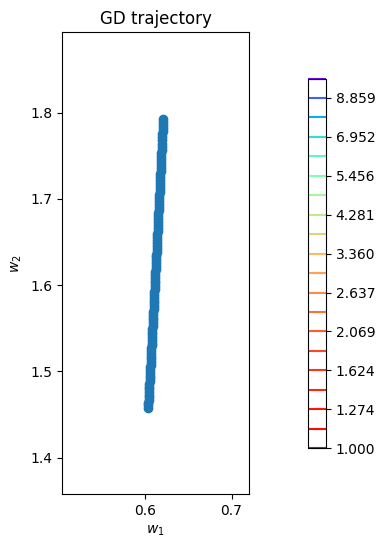

Градиентный спуск с параметром eta = 0.001


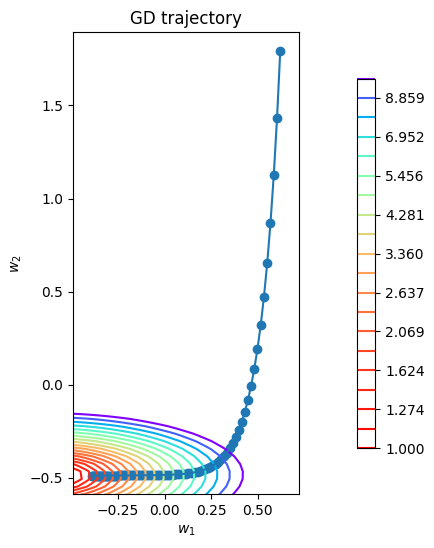

Градиентный спуск с параметром eta = 0.001


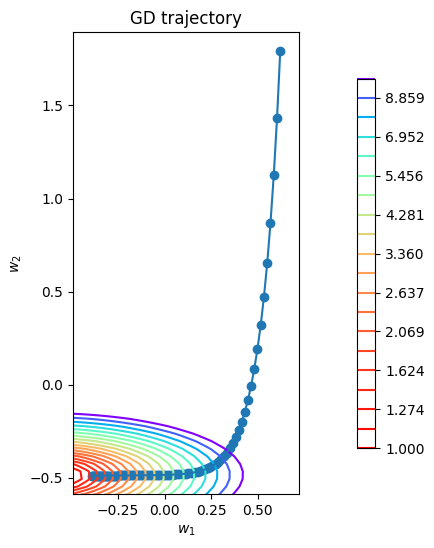

Градиентный спуск с параметром eta = 0.01


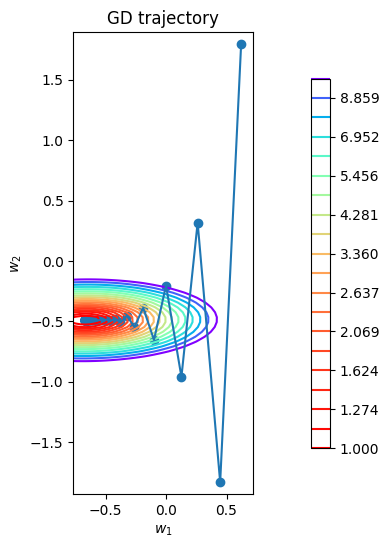

In [10]:
for eta in lr_array:
  print('Градиентный спуск с параметром eta = ' + str(eta))
  plot_gd(gradient_descent(w_init, X, y, loss, eta, 100), X, y, loss)

**Наблюдения**: при $\eta = 0.0001$ от маленького шага мы не доехали до минимума (в этом случае надо увеличить число итераций); при $\eta = 0.001$ плавно и хорошо доехали до минимума; при $\eta = 0.01$ доехали, но по началу дергано (видимо в области дерганности функция резко убывала и мы не загасили эту резкость нашим не супер маленьким $\eta$); при $\eta = 0.1$ очень сильно дергано.

Теперь реализуем **стохастический градиентный спуск**: (хэндбук яндекса)



> На каждом шаге градиентного спуска нам требуется выполнить потенциально дорогую операцию вычисления градиента по всей выборке. Возникает идея заменить градиент его оценкой на подвыборке (в английской литературе такую подвыборку обычно именуют **batch** или **mini-batch**; в русской разговорной терминологии тоже часто встречается слово **батч** или **мини-батч**).



Точнее, пусть $Q(w, X, y) = \frac{1}{k}\sum^{k}_{i=1}L(w,x_{i}, y_{i})$, где $w$ - веса, $x_{i}$ - $i$-ый объект (заданный через $n$ признаков $f_{j}(x_{i})$, $i=1,\dots, n$), $y_{i}$ - $i$-ый таргет и $L(w,x_{i},y_{i})$ - функция потерь. Тогда градиент $\nabla_{w}Q(w,X,y)$ является средней градиентов каждого слагаемого $\nabla_{w}L(w,x_{i},y_{i})$ и его можно разумно оценить по некоторой конечной подвыборке $(x_{i_{t}},y_{i_{t}})$, где $1 \le t \le B \le k$, как

$$\frac{1}{B}\sum^{B}_{t=1}\nabla_{w} L(w,x_{i_{t}},y_{i_{t}}).$$

$\{x_{i_{t}} \}^{B}_{t=1}$ - batch. **Вопрос**: *как делить выборку на батчи?*



> Ясно, что можно было бы случайным образом сэмплировать их из полного датасета, но даже если использовать быстрый алгоритм вроде резервуарного сэмплирования, сложность этой операции не самая оптимальная. Поэтому используют линейный проход по выборке (которую перед этим лучше всё-таки случайным образом перемешать).



Пусть размер батча равен $B$. *Стохастический градиентный спуск* заключается в том, чтобы разбить выборку на батчи размера $B$. Затем нужно последовательно пройти по всем батчам, вычисляя градиент на соответствующем батче и после обновляя веса $w$. Повторить пока не пройдем по всеб батчам.

Заметим, что *в случае линейного разбиения*, количество итераций, которое было в обычной градиентном спуске неявно передается в параметре $B$. Действительно, количество итераций равняется $[k/B]$, где $k$ - количество объектов выборки.

В классическом стохастическом градиентном спуске также добавляют гиперпараметр *количества эпох* $E$. При его указании предполагается повторить проход по всей выборке $E$ раз. Таким образом, количество итераций при линейном обходе равняется $E\cdot [k/B]$.

Если мы не используем линейное разбиение, то указывают, как и в градиентом спуске, количество итераций и на каждом шагу случайно выбирают батч размера $B$, вычисляют градиент на нем и, наконец, обновляют веса и продолжают процесс.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    Loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init

    stochastic_gradient_descent_array = [w]

    for i in range(n_iterations):

      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      y_batch = y[batch_indices]

      w = w - lr * Loss.calc_grad(batch, y_batch, w) # В этом случае w становится матрицей, что нас не очень устраивает
      w = np.array(w)

      stochastic_gradient_descent_array.append(w)

    return stochastic_gradient_descent_array

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [12]:
lr_array = [0.00001, 0.001, 0.001, 0.01]

In [13]:
batch_size_array = [10, 75, 120, 150]

Стохастический градиентный спуск с параметром eta = 1e-05 и batch_size = 10


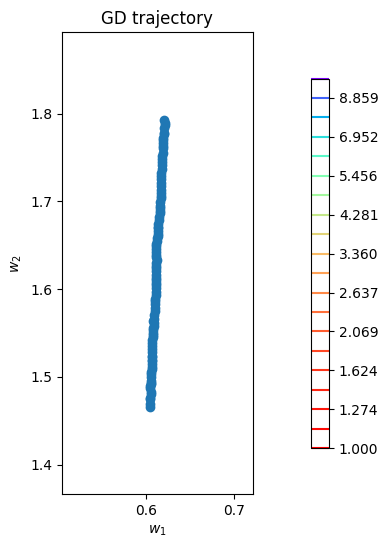

Стохастический градиентный спуск с параметром eta = 1e-05 и batch_size = 75


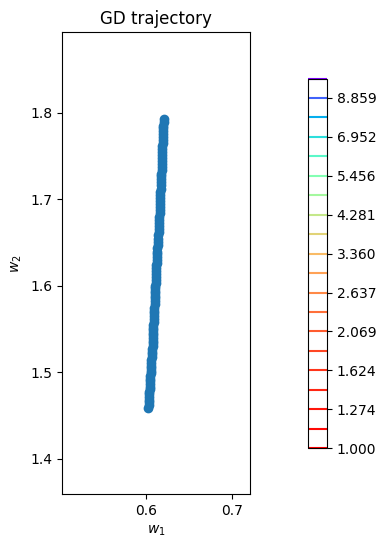

Стохастический градиентный спуск с параметром eta = 1e-05 и batch_size = 120


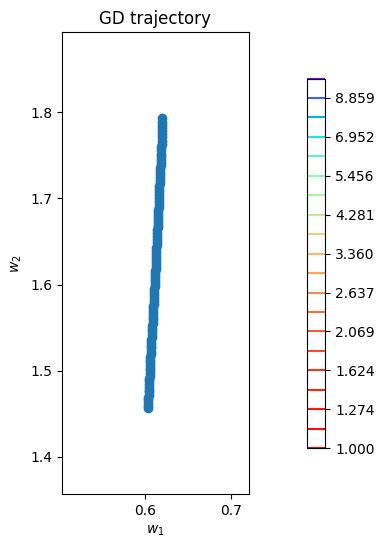

Стохастический градиентный спуск с параметром eta = 1e-05 и batch_size = 150


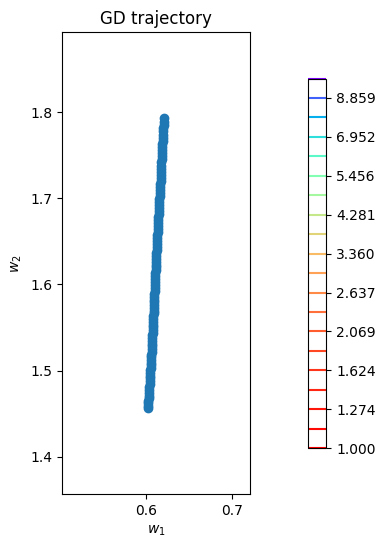

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 10


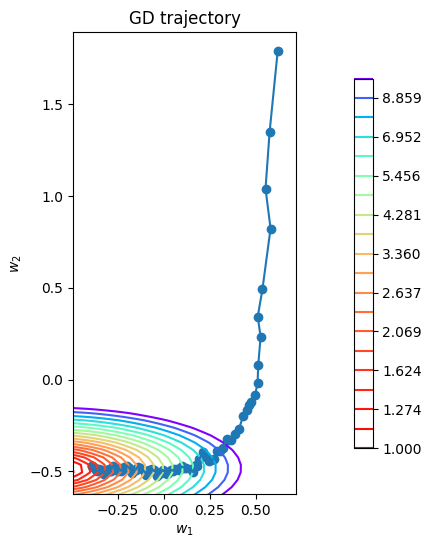

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 75


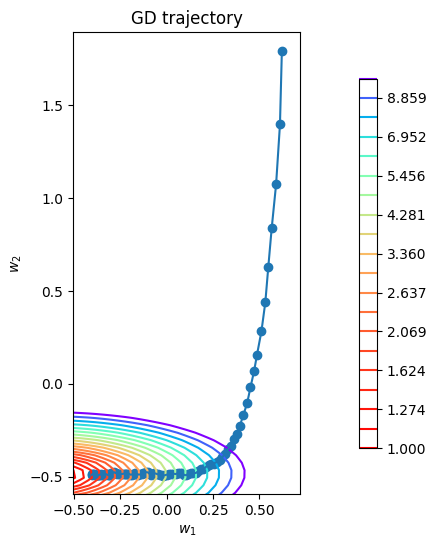

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 120


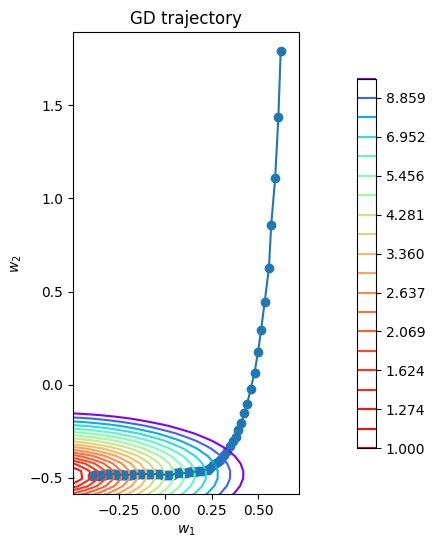

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 150


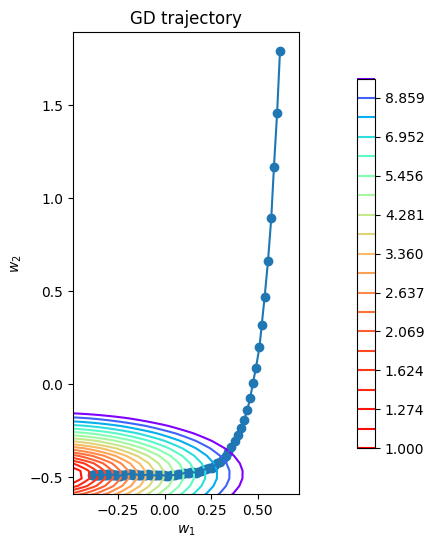

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 10


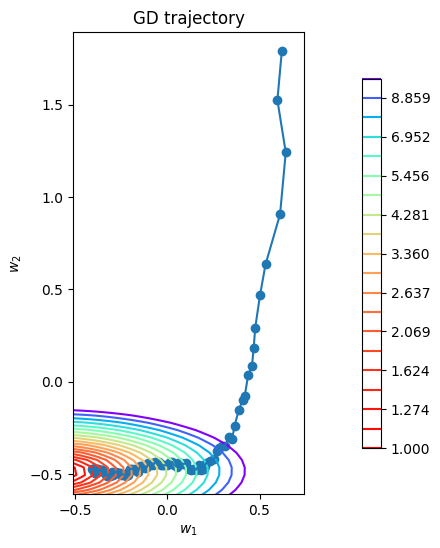

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 75


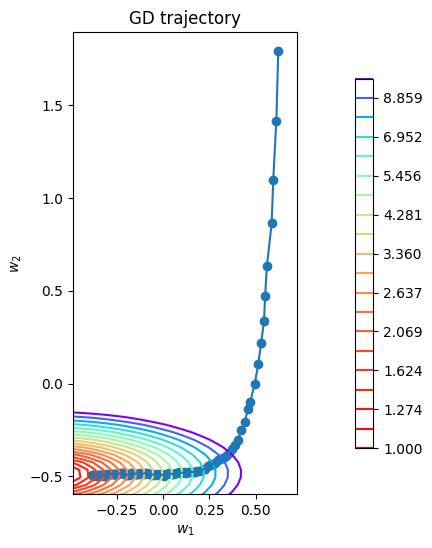

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 120


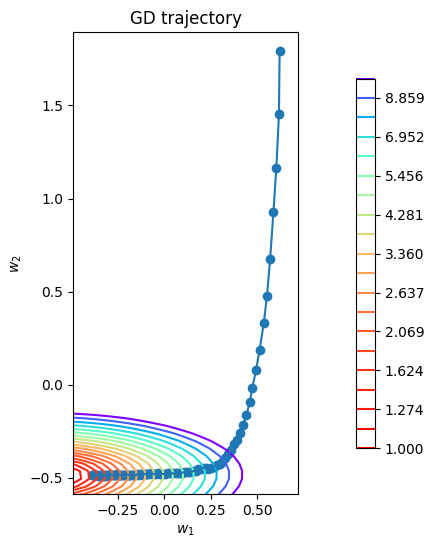

Стохастический градиентный спуск с параметром eta = 0.001 и batch_size = 150


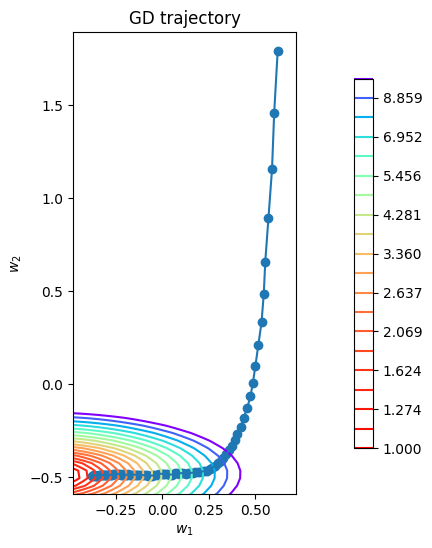

Стохастический градиентный спуск с параметром eta = 0.01 и batch_size = 10


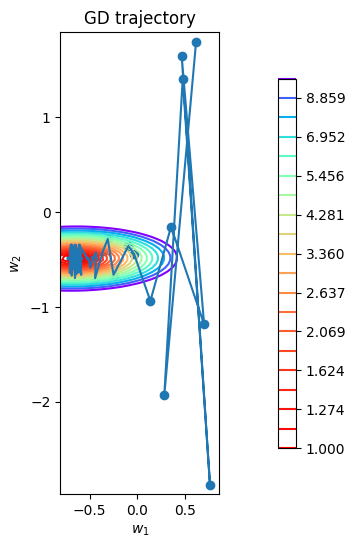

Стохастический градиентный спуск с параметром eta = 0.01 и batch_size = 75


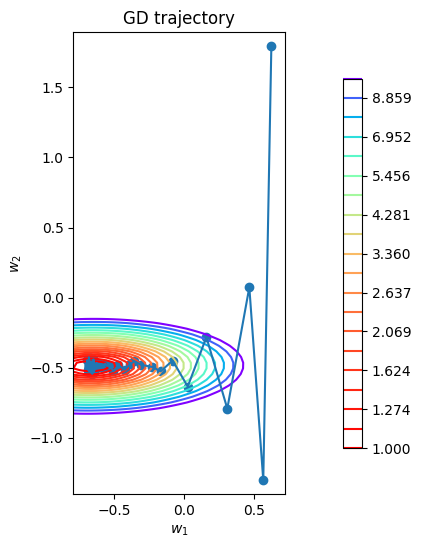

Стохастический градиентный спуск с параметром eta = 0.01 и batch_size = 120


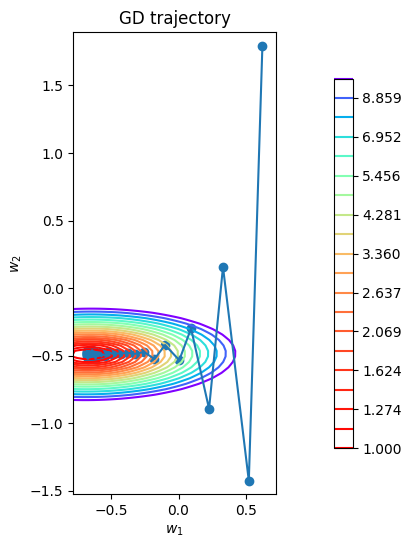

Стохастический градиентный спуск с параметром eta = 0.01 и batch_size = 150


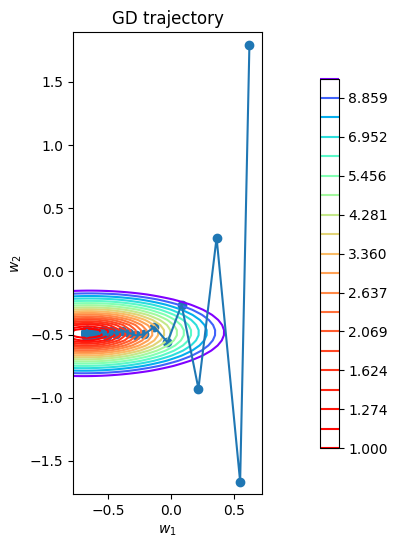

In [14]:
for eta in lr_array:
  for batch_size in batch_size_array:
    print('Стохастический градиентный спуск с параметром eta = ' + str(eta) + ' и batch_size = '+ str(batch_size))
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, eta, batch_size, 100), X, y, loss)

**Наблюдения**: чем больше batch_size - тем больше похоже на обычный градиентный спуск (логично), но интересно, что при достаточно неточных оценках происходят такие сильные скачки.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [15]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    Loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init

    stochastic_gradient_descent_array = [w]

    for i in range(n_iterations):

      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      y_batch = y[batch_indices]

      w = w - lr * ((1/(1+i))**p) * Loss.calc_grad(batch, y_batch, w) # В этом случае w становится матрицей, что нас не очень устраивает
      w = np.array(w)

      stochastic_gradient_descent_array.append(w)

    return stochastic_gradient_descent_array

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

In [16]:
p_list = [0.1, 0.3, 0.6, 0.9]

Стохастический градиентный спуск с параметром eta = 0.01, batch_size = 10 и p = 0.1


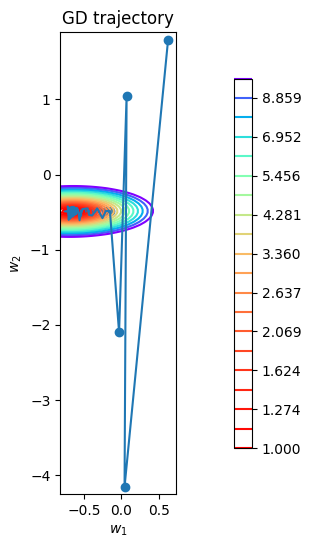

Стохастический градиентный спуск с параметром eta = 0.01, batch_size = 10 и p = 0.3


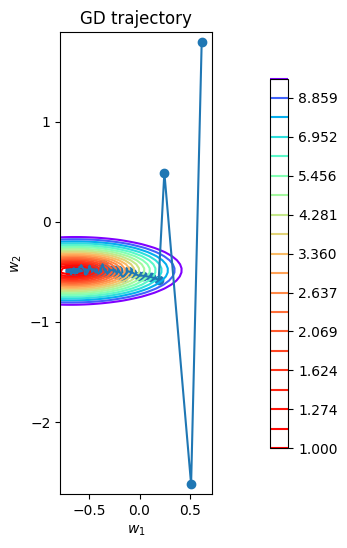

Стохастический градиентный спуск с параметром eta = 0.01, batch_size = 10 и p = 0.6


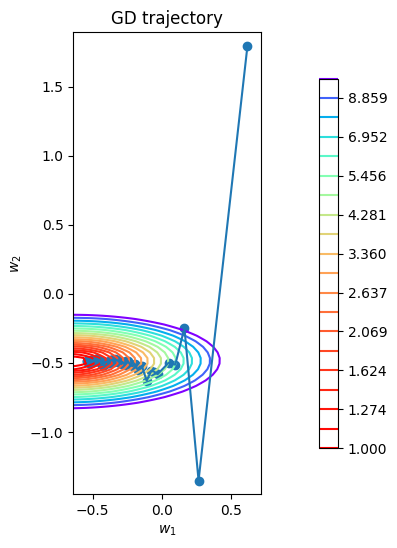

Стохастический градиентный спуск с параметром eta = 0.01, batch_size = 10 и p = 0.9


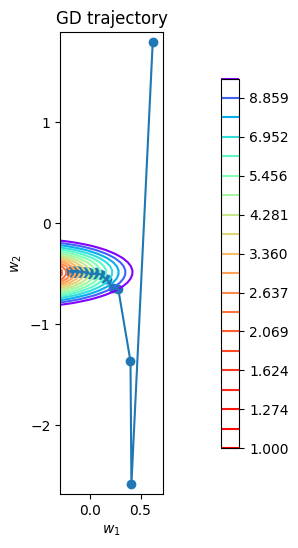

In [17]:
for p in p_list:
  print('Стохастический градиентный спуск с параметром eta = ' + str(0.01) + ', batch_size = '+ str(10) + ' и p = '+ str(p))
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p ,100), X, y, loss)

Это очень хорошее улучшение. Видно как раньше при $\eta = 0.01$, batch_size $= 10$ получали сильные колебания. При $p$ близком к $1$ мы немного не долетаем до минимума. Оптимальное из наблюдаемых значений $p=0.6$.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

Для каждого значения параметра $w$ вычислим MSE:

In [18]:
MSE_SGD = []
MSE_GD = []
for i in range(100):
  MSE_SGD.append(loss.calc_loss(X, y, stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.6 ,100)[i]))
  MSE_GD.append(loss.calc_loss(X,y, gradient_descent(w_init, X, y, loss, 0.01, 100)[i]))

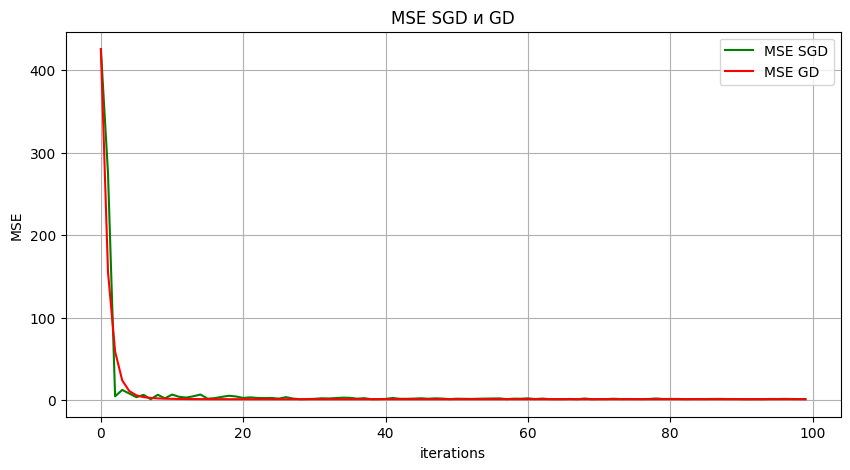

In [19]:
plt.figure(figsize=(10, 5))
plt.title("MSE SGD и GD")

plt.plot(np.arange(100), MSE_SGD, label='MSE SGD', color='green')
plt.plot(np.arange(100), MSE_GD, label='MSE GD', color ='red') #,  marker='o'

plt.xlabel('iterations') #Подпись для оси х
plt.ylabel('MSE') #Подпись для оси y

plt.grid(True)
plt.legend()

plt.show()

**Вывод**: и SGD и GD приближают параметры к точке минимума функции потерь. При удачном подборе параметра $p$ в долгосрочной перспективе они относительно одинаково удалены от минимума. Хотя по началу SGD дергается очень сильно. Нужно брать большое число шагов, чтобы получить стабилизацию.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [20]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.0001) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)

        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        n_feat = X.shape[1]
        w_init = np.random.uniform(-2, 2, n_feat)

        w = gradient_descent(w_init, X, y, self.loss, self.lr, 10000)[-1]

        self.w = w

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)


Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [21]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами:

In [22]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [23]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [24]:
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

Сразу удалим столбец `index`:

In [25]:
del X_raw['index']

Размеры:

In [26]:
X_raw.shape

(201, 25)

Посмотрим сколько пропусков и где:

In [27]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       164 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       199 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      197 non-null    float64
 19  19      197 non-null    float64
 20  20      201 non-null    float64
 21  21      199 non-null    float64
 22  22

Выведем уникальные значения столбца `1`:

In [28]:
print(*X_raw[1].unique(), sep=', ')

nan, 164.0, 158.0, 192.0, 188.0, 121.0, 98.0, 81.0, 118.0, 148.0, 110.0, 145.0, 137.0, 101.0, 78.0, 106.0, 85.0, 107.0, 104.0, 113.0, 150.0, 129.0, 115.0, 93.0, 142.0, 161.0, 153.0, 125.0, 128.0, 122.0, 103.0, 168.0, 108.0, 194.0, 231.0, 119.0, 154.0, 74.0, 186.0, 83.0, 102.0, 89.0, 87.0, 77.0, 91.0, 134.0, 65.0, 197.0, 90.0, 94.0, 256.0, 95.0


После гуглежа я выяснил, что первый столбец этого датасета означает *относительную среднюю выплату в связи с потерей застрахованного транспортного средства в год*. Поэтому ясно, что в первом столбце все `Nan` нужно заменить на нули.

In [29]:
X_raw[1] = X_raw[1].fillna(0)

In [30]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,0.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


Выведем уникальные значения столбца `5`:

In [31]:
print(*X_raw[5].unique(), sep=', ')

two, four, nan


После гуглежа я выяснил, что пятый столбец означает количество дверей машины. Напишем 'zero' вместо пропусков.

In [32]:
X_raw[5] = X_raw[5].fillna('zero')

Разберемся с столбцами `18` и `19`.

In [33]:
print(*X_raw[18].unique(), sep=', ')

3.47, 2.68, 3.19, 3.13, 3.5, 3.31, 3.62, 2.91, 3.03, 2.97, 3.34, 3.6, 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, nan, 3.39, 3.76, 3.58, 3.46, 3.8, 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7, 3.61, 3.94, 3.74, 2.54, 3.05, 3.27, 3.24, 3.01


In [34]:
print(*X_raw[19].unique(), sep=', ')

2.68, 3.47, 3.4, 2.8, 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9, 3.41, 3.07, 3.58, 4.17, 2.76, 3.15, nan, 3.16, 3.64, 3.1, 3.35, 3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9, 2.07, 2.36, 2.64, 3.08, 3.5, 3.54, 2.87


После гуглежа я выяснил, что столбцы `18` и `19` содержат некоторые метрические характеристики двигателя внутреннего сгорания. Значит, если стоят `NaN`, то и двигателя вовсе нет. Поэтому можно вписать нули.

In [35]:
X_raw[18] = X_raw[18].fillna(0)

In [36]:
X_raw[19] = X_raw[19].fillna(0)

Далее, столбец `21` содержит информацию о лошадинных силах машины. Заменим `NaN` на среднее.

In [37]:
X_raw[21].mean()

103.39698492462311

In [38]:
X_raw[21] = X_raw[21].fillna(X_raw[21].mean())

Аналогично поступим с столбцом `22`.

In [39]:
X_raw[22].mean()

5117.587939698493

In [40]:
X_raw[22] = X_raw[22].fillna(X_raw[22].mean())

Проверим, что `NaN`-ов больше не осталось:

In [41]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       201 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       201 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      201 non-null    float64
 21  21      201 non-null    float64
 22  22

Кодируем категориальные признаки:

Теперь будем разделять на тренировочную и тестовую выборки.

In [42]:
cat_features = X_raw[[2, 3, 4, 5, 6, 7, 8, 14, 15, 17]]

In [43]:
cat_features.head()

,2,3,4,5,6,7,8,14,15,17
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
encoder = OneHotEncoder()

In [46]:
encoded_features = encoder.fit_transform(cat_features).toarray()

In [47]:
encoded_df_features = pd.DataFrame(encoded_features)

In [48]:
encoded_df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Вещественные признаки:

In [49]:
real_features = X_raw[[0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]]

In [50]:
real_features.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,3,0.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,0.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,0.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


Соединяем в один датасет:

In [51]:
df = pd.concat([real_features, encoded_df_features], axis= 1)

In [52]:
df.head()

,0,1,9,10,11,12,13,16,18,19,...,50,51,52,53,54,55,56,57,58,59
0,3,0.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,0.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Следующим шагом разделим на тестовую и обучающую выборку.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=np.random.seed())

Теперь выполним нормализацию по (тестовым) вещественным признакам.

In [55]:
X_train_float = X_train[range(25)]
X_test_float = X_test[range(25)]
X_train_cat = X_train[range(25, 60)]
X_test_cat = X_test[range(25, 60)]

In [56]:
from sklearn.preprocessing import StandardScaler #импортируем модуль StandardScaler для нормализации данных

In [57]:
scaler = StandardScaler() #инициализируем объект класса StandardScaler

In [58]:
scaler.fit(X_train_float)

StandardScaler()

In [59]:
X_train_float_sc = scaler.transform(X_train_float)

In [60]:
X_test_float_sc = scaler.transform(X_test_float)

Теперь все соединяем:

In [61]:
X_train_sc = np.concatenate((X_train_float_sc, X_train_cat), axis= 1)
X_test_sc = np.concatenate((X_test_float_sc, X_test_cat), axis= 1)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [62]:
X_train_sc.shape

(140, 75)

In [63]:
LR = LinearRegression(MSELoss())

In [64]:
LR.fit(X_train_sc, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [65]:
from sklearn.metrics import mean_squared_error as MSE

print('ошибка MSE на обучающей выборке', MSE(LR.predict(X_train_sc), y_train))
print('ошибка MSE на тестовой выборке', MSE(LR.predict(X_test_sc), y_test))

ошибка MSE на обучающей выборке 3894969.1254805685
ошибка MSE на тестовой выборке 6943703.308703161


Наша модель переобучилась, поскольку разница между MSE существенная. Давайте добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [66]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Передается вместе с дополнительным столбцом единичек
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потер
        """
        w_0 = np.copy(w)
        w_0 = np.delete(w_0, len(w_0)-1)

        return 1/(X.shape[0]) * (np.linalg.norm(X.dot(w) - y))**2 + self.coef * w_0.dot(w_0)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_0 = np.copy(w)
        w_0[-1] = 0

        y = np.transpose(np.mat(y))
        w = np.transpose(np.mat(w))

        return np.array(np.transpose(2/(X.shape[0]) * np.transpose(X) * (X*w - y)))[0] + (2*self.coef) * w_0

Теперь мы можем использовать лосс с L2 регуляризацией в нашей регрессии, например, так:

In [67]:
ridge_loss = MSEL2Loss(0)

In [68]:
ridge_regression = LinearRegression(ridge_loss)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

По-хорошему, надо подбирать хороший коэффициент (гиперпараметр) $\lambda\ge 0$ через кросс-валидацию по обучающей выборке `X_train_sc`. Но в нашем классе нет метода `score`, а писать не хочется. Поэтому мы произведем валидацию по обучающей выборке. Посмотрим где ошибка `MSE2Loss` меньше.

In [69]:
lambda_list = [300, 250, 200, 150, 100, 10, 5, 1,	0.5, 0.1, 0.01, 0.001, 0.0001]

In [70]:
#lambda_list = []
#add = 0
#for i in range(1000):
#  add += 0.5
#  lambda_list.append(add)

In [71]:
MSE_train_list = []
MSE_test_list = []

for coef in lambda_list:
  ridge_loss = MSEL2Loss(coef) #ридж с нужным параметром coef
  linear_regression = LinearRegression(ridge_loss) # инициализируем линейную регрессию, которая будет минимизировать по риджу
  linear_regression.fit(X_train_sc, y_train) # обучаем ее на обучающей выборке

  X_train_sc_with_1 = np.hstack([X_train_sc, np.ones([X_train_sc.shape[0], 1])]) # Добавляем столбец из единиц для константного признака
  X_test_sc_with_1 = np.hstack([X_test_sc, np.ones([X_test_sc.shape[0], 1])]) # Добавляем столбец из единиц для константного признака

  MSE_train_list.append(loss.calc_loss(X_train_sc_with_1, y_train, linear_regression.w)) # вычисляем обычный MSE и добавляем в список
  MSE_test_list.append(loss.calc_loss(X_test_sc_with_1, y_test, linear_regression.w)) # вычисляем обычный MSE и добавляем в список

Наконец, посмотрим на `MSE_test` и выберем самую маленькую ошибку.

In [72]:
best_ld_id = np.argmin(np.array(MSE_test_list))

In [73]:
best_ld_id

11

In [74]:
lambda_list[best_ld_id]

0.001

Разумно выбрать $\lambda =$ `lambda_list[best_ld_id]` .

In [75]:
ridge_linear_regression = LinearRegression(MSEL2Loss(lambda_list[best_ld_id]))

In [76]:
ridge_linear_regression.fit(X_train_sc, y_train)

In [77]:
print('ошибка MSE на обучающей выборке', MSE(ridge_linear_regression.predict(X_train_sc), y_train))
print('ошибка MSE на тестовой выборке', MSE(ridge_linear_regression.predict(X_test_sc), y_test))

ошибка MSE на обучающей выборке 3897440.3896445446
ошибка MSE на тестовой выборке 6948054.728752508




---



В нашем датасете могут быть выбросы. С выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы не так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [78]:
def phi(epsilon, z):
  if -epsilon < z < epsilon:
    return 0.5 * z**2
  else:
    return epsilon*(np.abs(z)-0.5 * epsilon)

In [79]:
def nabla_phi(epsilon, z):
  if -epsilon < z < epsilon:
    return z
  else:
    return epsilon * np.sign(z)

In [80]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        sum = 0

        for i in range(X.shape[0]):
          sum = sum + phi(self.eps, X[i].dot(w)-y[i])

        return (1/X.shape[0])*sum

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w = np.array(w)
        grad = np.zeros(X.shape[1])

        for i in range(X.shape[0]):
          z = np.array(X[i]).dot(w) - y[i]
          grad = grad + nabla_phi(self.eps, z) * np.array(X[i])

          grad = np.array(grad)

        return (1/X.shape[0])*grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [81]:
Huberloss_regression = LinearRegression(HuberLoss(0.0001))

Выберем самый лучший $\varepsilon$.

In [92]:
epsilon_list = [1000, 950, 900, 850, 450, 400, 350, 300, 250, 200, 150, 100, 10, 5, 1,	0.5, 0.1, 0.01, 0.001]

In [93]:
MSE_train_list_hyper = []
MSE_test_list_hyper = []

for coef in epsilon_list:
  Huber_Loss = HuberLoss(coef)
  HuberLoss_regression = LinearRegression(Huber_Loss) #гиперлосс с нужным параметром coef
  HuberLoss_regression.fit(X_train_sc, y_train) # обучаем ее на обучающей выборке

  X_train_sc_with_1 = np.hstack([X_train_sc, np.ones([X_train_sc.shape[0], 1])]) # Добавляем столбец из единиц для константного признака
  X_test_sc_with_1 = np.hstack([X_test_sc, np.ones([X_test_sc.shape[0], 1])]) # Добавляем столбец из единиц для константного признака

  MSE_train_list_hyper.append(loss.calc_loss(X_train_sc_with_1, y_train, HuberLoss_regression.w)) # вычисляем обычный MSE и добавляем в список
  MSE_test_list_hyper.append(loss.calc_loss(X_test_sc_with_1, y_test, HuberLoss_regression.w)) # вычисляем обычный MSE и добавляем в список

In [94]:
best_eps_id = np.argmin(np.array(MSE_test_list_hyper))

In [95]:
best_eps_id

0

In [96]:
epsilon_list[best_eps_id]

1000

In [97]:
Huberloss_regression = LinearRegression(HuberLoss(epsilon_list[best_eps_id]))

In [98]:
Huberloss_regression.fit(X_train_sc, y_train)

In [99]:
print('ошибка MSE на обучающей выборке', MSE(Huberloss_regression.predict(X_train_sc), y_train))
print('ошибка MSE на тестовой выборке', MSE(Huberloss_regression.predict(X_test_sc), y_test))

ошибка MSE на обучающей выборке 133430620.27497976
ошибка MSE на тестовой выборке 152634194.5053144




---



Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание на потом**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.